Klasgroep: 201
</br>Voornaam: Jarno
</br>Achternaam: Fret
</br>Studentennummer: 015437346

##### Dependencies
Hieronder een lijst met belangrijke depencies. Indien nodig mag je nog extra dependencies toevoegen.

In [7]:
import numpy as np
import pandas as pd
from scipy.stats import binom, norm, poisson, t, ttest_1samp, chi2
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
import matplotlib.pyplot as plt
import math
import six
#import syssys.modules['sklearn.externals.six'] = six
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_recall_fscore_support, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from simanneal import Annealer
import inspyred
from inspyred import ec
from random import Random

##### Eigen scripts
Voeg hieronder de eigen geschreven functies toe die je tijdens het examen hebt gebruikt.

In [32]:
def plot_roc(y_true, y_score, title='ROC Curve', **kwargs):
    if 'pos_label' in kwargs:
        fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_score, pos_label=kwargs.get('pos_label'))
        auc = roc_auc_score(y_true, y_score)
    else:
        fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_score)
        auc = roc_auc_score(y_true, y_score)
    # bereken de optimale cut-off met de Youden index methode
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    figsize = kwargs.get('figsize', (7, 7))
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.grid(linestyle='--')
    # plot de ROC curve
    ax.plot(fpr, tpr, color='darkorange', label='AUC: {}'.format(auc))
    ax.set_title(title)
    ax.set_xlabel('False Positive Rate (FPR)')
    ax.set_ylabel('True Positive Rate (TPR)')
    ax.fill_between(fpr, tpr, alpha=0.3, color='darkorange', edgecolor='black')
    # plot de classifier
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # plot de optimale cut-off
    ax.scatter(fpr[optimal_idx], tpr[optimal_idx],
               label='optimal cutoff {:.2f} op ({:.2f},{:.2f})'.format(optimal_threshold, fpr[optimal_idx],
                                                                       tpr[optimal_idx]), color='red')
    ax.plot([fpr[optimal_idx], fpr[optimal_idx]], [0, tpr[optimal_idx]], linestyle='--', color='red')
    ax.plot([0, fpr[optimal_idx]], [tpr[optimal_idx], tpr[optimal_idx]], linestyle='--', color='red')
    ax.legend(loc='lower right')
    plt.show()

##### Bewerkingen in functie van de examenvragen
Voeg hieronder de python bewerkingen toe die je moet uitvoeren om het juiste antwoord te bekomen.
</br>Voorzie voor iedere vraag op het examen dezelfde structuur als voor vraag 1 en 2.
</br>Vragen zonder bewerkingen mag je leeg laten.
</br>Zorg ervoor dat de databestanden niet in een andere folder zitten dan dit bestand.

###### Vraag 1

Gebruik discriminant analyse met prijs als afhankelijke variabele en  de 3 andere variabelen als onafhankelijke variabelen.
Wat is volgens het model de kans dat de prijs 'goud' is voor een persoon wanneer je weet dat deze persoon als bedrag 1000 betaalde en een aantal deelnames heeft van 12 op een dag dat het 280°K was?


In [37]:
dataset = pd.read_csv('examen2.csv', decimal=',',sep=';', na_values=['ONBEKEND'])
dataset.info()

dataframe = dataset[['bedrag','aantal', 'temperatuur (Kelvin)','prijs']]
dataframe = dataframe.dropna()
dataframe.info()

X = dataframe[['bedrag', 'aantal', 'temperatuur (Kelvin)']]
Y = dataframe[['prijs']]

persoon = pd.DataFrame([[1000,12,280]])

lda = LinearDiscriminantAnalysis()
lda.fit(X,Y)
predicted = lda.predict(persoon)
kans = lda.predict_proba(persoon)
print(kans)
print(predicted)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    100 non-null    int64  
 1   bedrag                95 non-null     float64
 2   provincie             97 non-null     object 
 3   hoeveelheid regen     97 non-null     float64
 4   datum1                95 non-null     object 
 5   aantal                96 non-null     float64
 6   behaaldeGraad         96 non-null     object 
 7   prijs                 97 non-null     object 
 8   massa                 96 non-null     float64
 9   rugnummer             98 non-null     float64
 10  vermogen              96 non-null     float64
 11  temperatuur (Kelvin)  94 non-null     float64
 12  belangrijkheid        97 non-null     object 
 13  temperatuur           96 non-null     object 
 14  datum2                96 non-null     object 
 15  opinie                91

C:\Users\jarno\OneDrive - Karel de Grote Hogeschool\KDG\2022-2023\Data Science 2\PythonProject\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jarno\OneDrive - Karel de Grote Hogeschool\KDG\2022-2023\Data Science 2\PythonProject\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\jarno\OneDrive - Karel de Grote Hogeschool\KDG\2022-2023\Data Science 2\PythonProject\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


###### Vraag 2

Ga na of aan de voorwaarde voor een discriminant analyse, waarbij vermogen voorspeld wordt door bedrag, massa en aantal, is voldaan door de correlatie te berekenen tussen de onafhankelijke variabele. Hoeveel bedraagt de hoogste correlatie tussen die onafhankelijke variabelen onderling?

###### Vraag 3

In de kolom prijs vind je de effectieve prijs die de personen in de dataset hebben behaald, in de kolom LDA.prijs de prijs die ‘voorspeld’ werd aan de hand van discriminantanalyse op basis van een aantal andere -numerieke- kolommen.

Maak voor de dataframe een confusion matrix en bereken de recall voor de klasse ‘goud’.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 1 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   prijs      73 non-null     object
 1   LDA.prijs  73 non-null     object
dtypes: object(2)
memory usage: 1.7+ KB


0.5

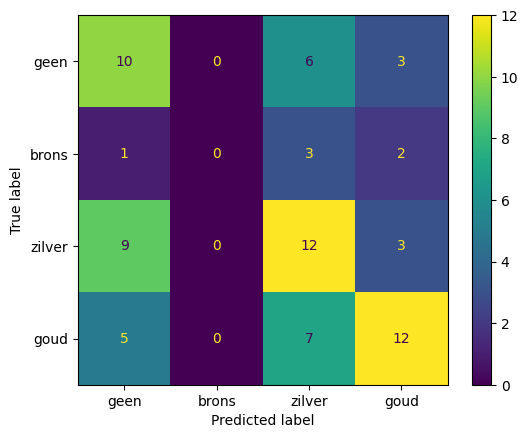

In [34]:
eval = dataset[['prijs', 'LDA.prijs']]
eval= eval.dropna()
eval.info()


actual = eval['prijs'].rename('actual')
predicted = eval['LDA.prijs']
cm = confusion_matrix(actual, predicted, labels=['geen','brons','zilver','goud'])
cmd = ConfusionMatrixDisplay(cm,display_labels=['geen','brons','zilver','goud'])
cmd.plot()

10/(5+7+12)

###### Vraag 4

Gebruik bij de functie read_csv de parameter  na_values=['ONBEKEND'] om de waarde 'ONBEKEND' om te zetten naar 'NaN' en gebruik het juiste decimale teken.
Maak een dataframe met de naam ex_eval aan met enkel de kolommen prijs, LDA.prijs en LDA.score.
Verwijder uit deze nieuwe dataframe alle rijen met NaN-values met dropna()
Voeg in de dataset de klassen ‘brons’, ‘zilver’ en ‘goud’ samen tot de klasse ‘medaille’ met volgende code: ex_eval = ex_eval.replace(['goud','zilver','brons'], 'medaille'). We zijn enkel geïntresseerd of de persoon al dan niet een medaille heeft behaald.

In de kolom prijs vind je de effectieve prijs die de personen in de dataset hebben behaald.
In de kolom LDA.prijs de prijs die ‘voorspeld’ werd.
In de kolom LDA.score vind je de kans dat de personen GEEN medaille heeft gewonnen.

Wat is de False Positive Rate voor de 'optimal cutoff' tresholdwaarde in de ROC-curve voor de voorspellingen voor het NIET winnen van een medaille?

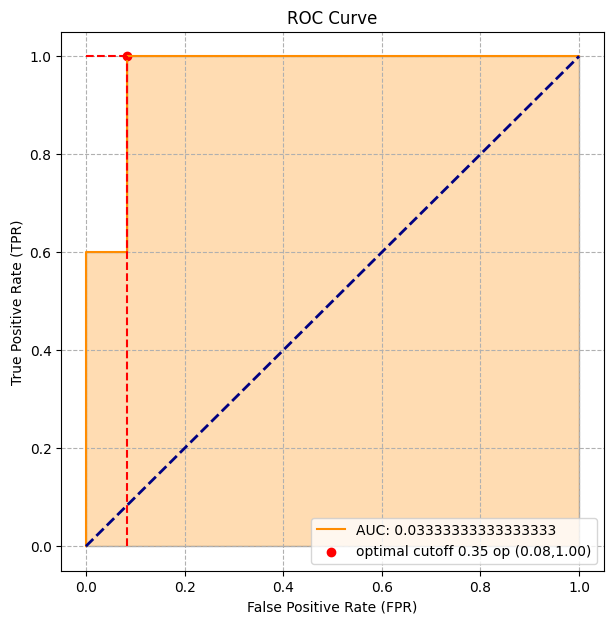

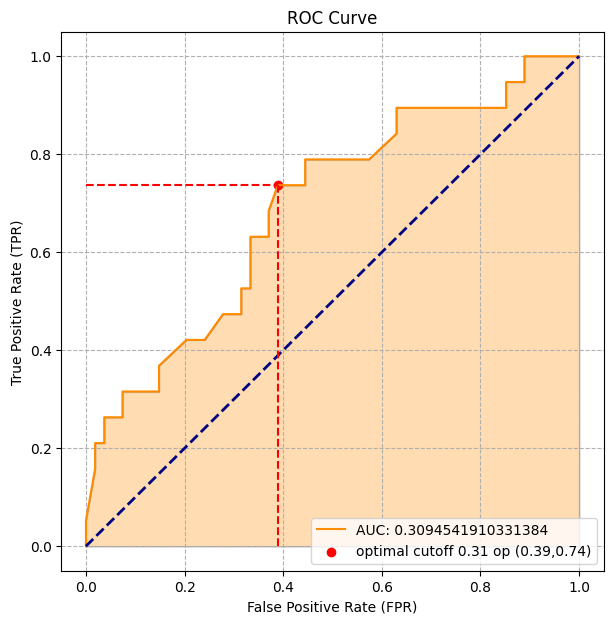

In [36]:
eval = dataset[['prijs', 'LDA.prijs', 'LDA.score']]
eval = eval[eval['prijs'].isna() | eval['LDA.prijs']].dropna()
eval = eval.replace(['goud','zilver','brons'], 'medaille')
eval
plot_roc(eval[['LDA.prijs']], eval[['LDA.score']], pos_label='geen')
plot_roc(eval[['prijs']], eval[['LDA.score']], pos_label='geen')

###### Vraag 7

Maak de doelfunctie aan in Python en bepaal dan de waarde van de doelfunctie voor de initiële oplossing X=[4,5,..,28]  (dus: xi= i+3 voor i=1,..25)

###### Vraag 8

Gegeven volgende fitness-functie van een genetisch algoritme:

def evaluate(x):
    return((2.25 - x[0]*x[0] - x[1]*x[1] + 0.1 * np.cos(6.0*math.pi*x[0]) + 0.1 * np.cos(6.0*math.pi*x[1])))

Welke twee individuen uit de volgende populatie maken volgens het roulettewiel-selectiemechanisme de meeste kans om gekozen te worden om ‘offspring’ voort te brengen?

De populatie bestaat uit de individuen X1, X2, ...X10:

x1 = [1.0,0.5]
x2 = [-0.5,-0.5]
x3 = [1.0,1.0]
x4 = [-0.75,-0.75]
x5 = [-0.5,0.0]
x6 = [-0.5,-1.0]
x7 = [0.5,0.5]
x8 = [0.5,0.0]
x9 = [0.75,0.75]
x10 = [-1.0,-1.0]

pop = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10]

###### Vraag 9
Volgend rugzak-probleem dient te worden opgelost:

Er zijn n voorwerpen (waarbij n een veelvoud is van 4), voorzie dus een oplossingsvector van lengte n: (x1,...,xn)  xi = 0 wanneer het i° voorwerp niet in de rugzak terecht komt en xi=1 wanneer het i°voorwerp wel in de rugzak wordt gestopt.  De voorwerpen kunnen in 3 groepen ingedeeld worden: de witte, de rode en de groene voorwerpen Het eerste kwart van de voorwerpen zijn wit en wegen elk 0.5 kg, het tweede kwart van de voorwerpen is rood en wegen elk 1 kg en de rest (de laatste helft) van de voorwerpen is groen en wegen elk 2 kg. Van elke kleur moet er steeds minstens 1 voorwerp in de rugzak zitten. Een wit voorwerp heeft een nutswaarde van 7.5, een rode een nutswaarde van 5 en een groene een nutswaarde van 10. De rugzak kan maar de helft van het totale gewicht van de voorwerpen dragen.

Vervolledig zelf volgende Python implementatie van de te maximaliseren doelfunctie (plaats de aangevulde code in je oplossingenfile):

def objectieve_functie(oplossing):
    n=len(oplossing) #opmerking: n is steeds een veelvoud van 4

    #Aantal voorwerpen per kleur in oplossing tellen
    kleurconstraint=np.zeros(3,dtype=np.int64)
    kleurconstraint[0]=sum(oplossing[0:int(n/4)]) #hoeveelheid witte voorwerpen
    kleurconstraint[1]=sum(oplossing[int(n/4):int(n/2)]) #hoeveelheid rode voorwerpen
    kleurconstraint[2]= sum(oplossing[int(n/2):n]) #hoeveelheid groene voorwerpen
    gewichten=np.zeros(n,dtype=np.float64)

    #gewichten toekennen
    gewichten[0:int(n/4)]=0.5
    gewichten[int(n/4):int(n/2)]=1
    gewichten[int(n/2):n]=2

    #nutswaarden toekennen
    nutswaarde=np.zeros(n,dtype=np.float64)
    nutswaarde[0:int(n/4)]=7.5
    nutswaarde[int(n/4):int(n/2)]=5
    nutswaarde[int(n/2):n]=10
    totaalGewicht=sum(gewichten*oplossing)
    if (                               ): #Vervolledig deze regel!!
        objFuncWaarde=                    #Vervolledig deze regel!!
    else:
        objFuncWaarde= -100 * n
    return objFuncWaarde

Neem als initiële startoplossing initiële_oplossing=[1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]

Wat is de de waarde van de doelfunctie in de initiële oplossing?

###### Vraag 10
Gebruik voor deze vraag de dataset examen2.csv.

Gebruik bij de functie read_csv de parameter  na_values=['ONBEKEND'] om de waarde 'ONBEKEND' om te zetten naar 'NaN' en gebruik het juiste decimale teken. (Verwijder geen NA values)

Je wil eeen neural netwerk bouwen waarbij je de opinie wenst te voorspellen aan de hand van de variabelen bedrag, hoeveelheid.regen, aantal, massa, vermogen en temperatuur..Kelvin.

Je dient echter eerst de variabelen te schalen. Herschaal de variabele temperatuur Kelvin aan de hand van de min-max normalisatie.

Wat is het gemiddelde van de herschaalde variabele temperatuur
Kelvin?